In an ever-evolving world of finance, accurately predicting stock market movements has long been an elusive goal for investors and traders alike. While countless strategies and models have emerged over the years, one approach has recently gained significant traction due to its ability to capture complex patterns and dependencies in historical data: Long Short-Term Memory (LSTM). Leveraging the power of deep learning, LSTM offers a promising avenue for unlocking insights into the unpredictable nature of the stock market. We delve into the realm of LSTM-based stock market predictions and explore how this innovative approach has the potential to transform investment strategies.

At its core, LSTM is a variant of Recurrent Neural Networks (RNNs), designed specifically to address the vanishing gradient problem that plagues traditional RNNs. The vanishing gradient problem refers to the phenomenon where the gradients of early layers in the network become increasingly small, hindering their ability to capture long-term dependencies. LSTM overcomes this limitation by incorporating memory cells, gates, and carefully engineered connections, enabling it to selectively retain and propagate information over extended time intervals. This unique architecture allows LSTM models to capture intricate temporal relationships in sequential data, making them particularly well-suited for predicting time series data, such as stock prices.

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

Here we import pandas , matplotlib for plotting, numpy, sklearn for preprocessing ,scale adjusting and error calculations, and tensorflow for model building.

### Import the Dataset

In [2]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


### Analysis of data

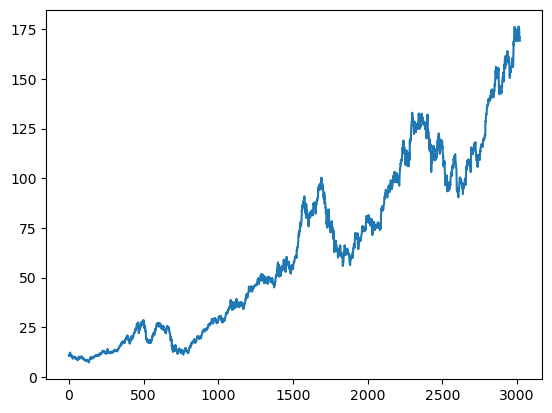

In [3]:
df2 = df.reset_index()['Close']
plt.plot(df2)

We will be doing stock predictions on Close column.

### Data Preprocessing

In [4]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(3019, 1)

Here we scale down the values between (0,1).

### Train-Test Split

In [5]:
train_size = int(len(df2)*0.7)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

Here we took 70% of data for training and the rest 30% for testing.

In [6]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

A function is created as create_dataset() which splits the dataset into 2 based on the time step we take. The first dataset i.e.; dataX takes the values as its input and the second dataset dataY takes the values as output. Basically it creates a dataset matrix from the above dataset.

In [7]:
# calling the create dataset function to split the data into 
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [8]:
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(2012, 100)
[[0.02033337 0.0205107  0.02003783 ... 0.01052134 0.01069866 0.01152619]
 [0.0205107  0.02003783 0.02163376 ... 0.01069866 0.01152619 0.01087599]
 [0.02003783 0.02163376 0.02139733 ... 0.01152619 0.01087599 0.0089254 ]
 ...
 [0.43013359 0.425464   0.43096111 ... 0.46772668 0.4678449  0.4692044 ]
 [0.425464   0.43096111 0.42428183 ... 0.4678449  0.4692044  0.46997281]
 [0.43096111 0.42428183 0.41399693 ... 0.4692044  0.46997281 0.47576546]]
(805, 100)
(805,)


### Creating and fitting LSTM model

In [9]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

Here we added 4 layers of LSTM with 1 as input layer, 2 as hidden layers and 1 for output layer as Dense. In first 3 layers we took 50 neurons and 1 for output.

We compiled the model with an Adam Optimizer which will be calculating the loss using mean squared error.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here's what model.summary() typically tells you:

Layer Information: It lists all the layers in the model in a sequential order, showing the type of layer (e.g., Dense, Conv2D, LSTM, etc.) and the output shape of each layer.

Output Shape: For each layer, the output shape of the layer is provided. This gives you an idea of how the dimensions change as the data flows through the network.

Param Count: It displays the number of parameters (weights and biases) in each layer. This count is important as it indicates the capacity of the model and contributes to its ability to learn from the data.

Output Shape Calculation: It shows how the output shape is calculated based on the layer's configuration and the input shape. This can help you understand how the dimensions change through the network.

Trainable Parameters: The total number of trainable parameters in the model is usually provided at the bottom. These are the parameters that will be updated during the training process to minimize the loss.

Non-Trainable Parameters: Some layers might have non-trainable parameters, like those in BatchNormalization or other normalization layers. These parameters are not updated during training but are used to normalize the data.

In summary, model.summary() is a valuable tool to quickly understand the structure of your neural network model, see the flow of data through different layers, and get an idea of the model's complexity (which can affect training time and potential for overfitting). It's an essential step in model development and debugging.


In [11]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 32,verbose = 1)

Epoch 1/100
63/63 [==============================] - 5s 56ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 2/100
63/63 [==============================] - 3s 53ms/step - loss: 2.9009e-04 - val_loss: 0.0039
Epoch 3/100
63/63 [==============================] - 3s 52ms/step - loss: 2.5247e-04 - val_loss: 0.0028
Epoch 4/100
63/63 [==============================] - 3s 54ms/step - loss: 2.4295e-04 - val_loss: 0.0023
Epoch 5/100
63/63 [==============================] - 3s 55ms/step - loss: 2.4495e-04 - val_loss: 0.0044
Epoch 6/100
63/63 [==============================] - 3s 55ms/step - loss: 2.2107e-04 - val_loss: 0.0024
Epoch 7/100
63/63 [==============================] - 3s 55ms/step - loss: 2.1221e-04 - val_loss: 0.0025
Epoch 8/100
63/63 [==============================] - 3s 53ms/step - loss: 2.0288e-04 - val_loss: 0.0020
Epoch 9/100
63/63 [==============================] - 3s 54ms/step - loss: 1.9354e-04 - val_loss: 0.0044
Epoch 10/100
63/63 [==============================] - 3s 53ms/step -

Epoch 78/100
63/63 [==============================] - 4s 59ms/step - loss: 4.0072e-05 - val_loss: 0.0012
Epoch 79/100
63/63 [==============================] - 4s 60ms/step - loss: 4.2832e-05 - val_loss: 7.3509e-04
Epoch 80/100
63/63 [==============================] - 4s 61ms/step - loss: 3.7018e-05 - val_loss: 4.0454e-04
Epoch 81/100
63/63 [==============================] - 4s 61ms/step - loss: 4.7336e-05 - val_loss: 2.5667e-04
Epoch 82/100
63/63 [==============================] - 4s 60ms/step - loss: 3.4646e-05 - val_loss: 6.9098e-04
Epoch 83/100
63/63 [==============================] - 4s 60ms/step - loss: 3.1957e-05 - val_loss: 4.1175e-04
Epoch 84/100
63/63 [==============================] - 4s 59ms/step - loss: 3.8076e-05 - val_loss: 9.0143e-04
Epoch 85/100
63/63 [==============================] - 4s 59ms/step - loss: 3.8044e-05 - val_loss: 5.4593e-04
Epoch 86/100
63/63 [==============================] - 4s 60ms/step - loss: 4.5187e-05 - val_loss: 2.0369e-04
Epoch 87/100
63/63 [===

Here, the model has been trained for 100 epochs each with a batch size of 64.

### Prediction and checking performance matrix

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

26/26 [==============================] - 0s 12ms/step


This function takes input data (or a batch of input data) and produces corresponding output predictions based on the learned patterns and relationships that the model has captured during training.

Here's what model.predict() does:

Input Data: You provide the input data to the function. The input data should be formatted in the same way as the data that the model was trained on. This could be a single data point or a batch of data points.

Forward Pass: The input data is passed through the layers of the neural network in a forward pass. Each layer processes the data and transforms it based on the weights and biases learned during training.

Output Prediction: The output of the final layer (or the specified output layer) is the prediction generated by the model for the given input. This prediction could be a class label, a regression value, a probability distribution, or any other type of output depending on the nature of the problem and the architecture of the model.

Post-Processing: Depending on the specific problem, you might need to post-process the model's output to interpret the results. For example, if you're working with a classification problem, you might need to convert predicted probability scores into class labels.

Output: The model.predict() function returns the model's predictions based on the provided input data.

This function is particularly useful for evaluating how well your trained model performs on new, unseen data or for making predictions on real-world data. Keep in mind that the input data should be preprocessed in the same way as the training data to ensure consistency. Additionally, the output of model.predict() can provide insights into how confident the model is in its predictions, which can be helpful for decision-making.

Overall, model.predict() is a crucial function for applying your trained neural network model to real-world data and extracting useful information or predictions from it.


In [13]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

As we scaled down the values of dataset in 0 and 1, we need to again reverse the transformation in order to get accurate predicted values on the graph hence , here we inverse the transform of both the predictions.

Now its time for calculating the rmse performance matrix.

In [14]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

49.278945327582974
124.02413134809426


Here both the values calculated are very close i.e.; in difference is less than 70, which indicates that the model accuracy is good but can be improved.

RMSE, which stands for Root Mean Squared Error, is a common performance metric used in regression tasks to assess the accuracy of a predictive model's predictions. It quantifies the difference between the predicted values and the actual (ground truth) values. RMSE is particularly useful because it penalizes larger errors more severely than smaller errors, giving you a sense of how far off your predictions are on average.

Here's why you might want to calculate RMSE and what the differences it states mean:

Quantifying Prediction Accuracy: RMSE provides a way to measure how closely the predicted values align with the actual values. The lower the RMSE, the better the model's predictions match the real data.

Interpretability: RMSE is expressed in the same units as the target variable, which makes it easier to interpret in a real-world context. For instance, if you're predicting house prices in dollars, the RMSE will also be in dollars, allowing you to understand the average prediction error in terms of currency.

Comparative Analysis: RMSE can be used to compare different models or variations of the same model. When comparing models, a lower RMSE indicates better predictive performance.

Outliers Impact: RMSE is sensitive to outliers. Large errors have a greater influence on RMSE due to the squaring of the errors. This makes it important to identify and handle outliers appropriately.

RMSE Value Interpretation: The value of RMSE gives you an idea of the typical size of prediction errors. Smaller RMSE values indicate better predictive accuracy. However, the "goodness" of an RMSE value depends on the specific problem and the range of the target variable. It's useful to compare the RMSE to the range of the target variable to get a sense of proportionality. For instance, an RMSE of 10 for predicting house prices might be considered good if house prices range from 100 to 1000, but not so good if they range from 10 to 20.

Meaningful Feedback: RMSE can provide valuable feedback during model development. If your RMSE is very high, it might indicate that your model needs improvement. By analyzing which data points are causing the largest errors, you can gain insights into areas where your model is struggling and potentially improve it.

In summary, RMSE is a useful metric for evaluating the performance of regression models and understanding how accurate their predictions are. It gives you a quantitative measure of prediction errors, which is essential for making informed decisions about your model's quality and potential areas of improvement.


### Graph Plotting

In [15]:
look_back = 100

In [16]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

Lookback variable takes the number of values behind the current value i.e.; remembering the previous 100 values which is as same as LSTM. Here every time while plotting the graph, the trainPredictionPlot will take 100 values behind them and plot it. and the plotting goes from previous 100th value and goes till the length of the trainpredict + the lookback i.e.; 100.

In [17]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

Same goes for TestPredictionPlot but this time it takes the values next to the Train_predict. Here lookback will start from where the train predict ends.

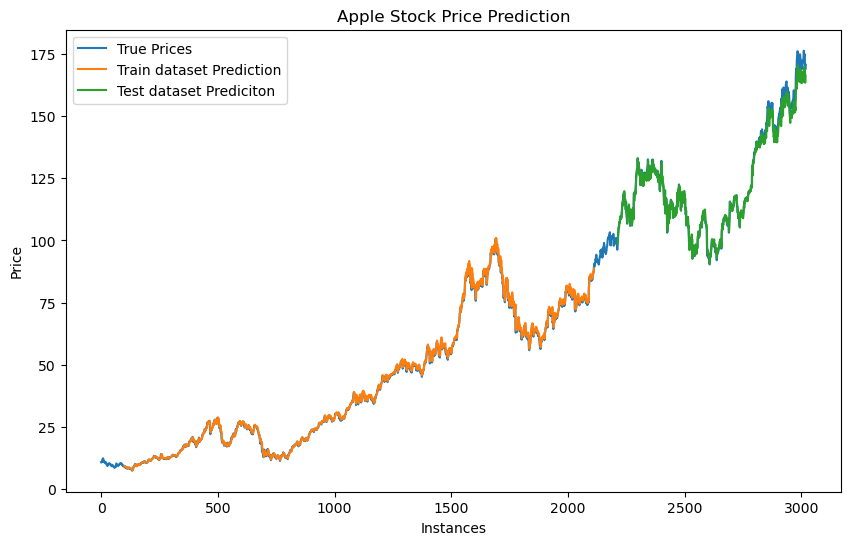

In [18]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(df2), label='True Prices')
plt.plot(trainPredictPlot, label='Train dataset Prediction')
plt.plot(testPredictPlot, label='Test dataset Prediciton')
plt.legend()
plt.title('Apple Stock Price Prediction')
plt.xlabel('Instances')
plt.ylabel('Price')
plt.savefig('LSTM model Prediction plot')
plt.show()

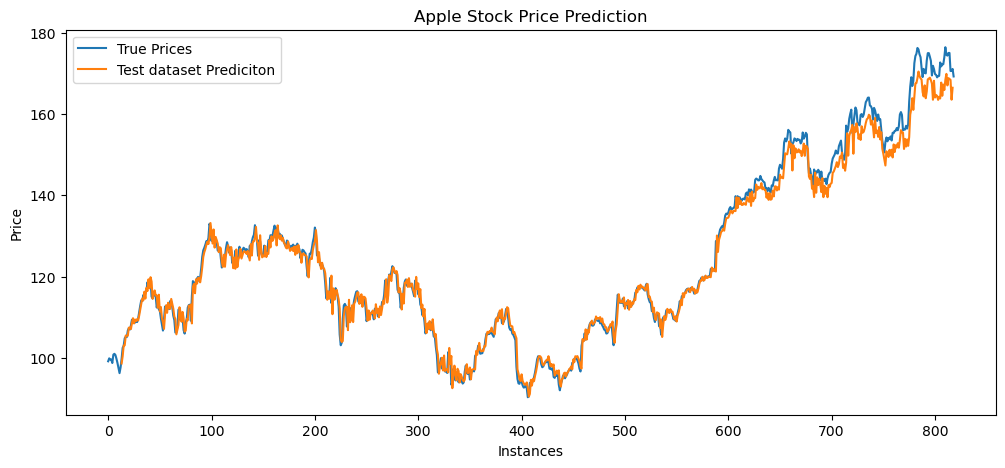

In [19]:
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(df2)[2200:], label='True Prices')
plt.plot(testPredictPlot[2200:], label='Test dataset Prediciton')
plt.legend()
plt.title('Apple Stock Price Prediction')
plt.xlabel('Instances')
plt.ylabel('Price')
plt.savefig('Prediction plot 50x100-v1')
plt.show()

Here, orange is the TrainPredictionPlot, green is the TestPredictionPlot and blue is the actual dataset. Hence we can see that our model has predicted the stock prices very well.

#### The model is just for the learning purposes and is not recommended for any future investments.

### Conclusion

# SHAP (SHapley Additive exPlanations) - 
is a powerful method for explaining the output of machine learning models by assigning each feature's contribution to a prediction. It's a framework that provides insights into the importance of individual features in making specific predictions. While SHAP is often associated with explaining complex models like tree-based models or neural networks, its application to LSTM models can be highly insightful.

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) commonly used for sequence data, such as time series or text. Explaining LSTM models using SHAP involves understanding how each input feature (or in the case of sequence data, each time step's features) contributes to the final output prediction.

Here's how SHAP can be applied to an LSTM model:

Feature Attribution: SHAP values provide an estimation of the contribution of each feature to the model's output. For an LSTM model, this means understanding how the input features at each time step contribute to the final prediction. This helps you answer questions like "Which words or time steps in a sequence had the most influence on the model's decision?"

Time Series Interpretability: SHAP can help unravel the black box of an LSTM for time series data. It allows you to identify the time steps that play a significant role in the model's predictions, enabling you to explain why certain predictions were made.

Variable Importance: Just like in other types of models, SHAP can rank the importance of features or time steps in the LSTM. This can be invaluable for understanding which parts of the input sequence have the greatest impact on the model's decisions.

Global and Local Interpretability: SHAP provides both global and local explanations. Global explanations give an overview of feature importance across the entire dataset, while local explanations focus on understanding individual predictions. This is particularly helpful for identifying patterns in the LSTM's behavior.

Insights for Model Improvement: By analyzing SHAP values, you can identify cases where your LSTM model is making decisions that seem counterintuitive. This can guide improvements in the model's architecture, training data, or preprocessing.

Aid in Debugging: If your LSTM model is misbehaving or not performing as expected, SHAP values can help you pinpoint which parts of the input sequence are causing the issues.

It's important to note that applying SHAP to LSTM models might require some adaptation since SHAP was originally designed for static tabular data. However, various libraries and methods have been developed to extend SHAP to more complex models, including those handling sequences and other structured data. Libraries like shap and captum (for PyTorch) provide tools for calculating SHAP values for LSTM models.

In conclusion, applying SHAP to LSTM models can enhance your understanding of how the model processes sequential data and what features or time steps have the most influence on its predictions, leading to improved interpretability and model development.


In [20]:
import shap
import time
import tensorflow as tf

shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


shap.initjs() is a function provided by the SHAP (SHapley Additive exPlanations) library in Python. SHAP is a popular tool for interpreting the output of machine learning models, providing insights into feature importance and the contribution of each feature to individual predictions. The shap.initjs() function is used to initialize the JavaScript visualization library required for displaying SHAP summary plots and other visual explanations in a Jupyter Notebook or other interactive environments.

Here's how shap.initjs() works and why it's important:

JavaScript Initialization: SHAP summary plots and some other visualizations are rendered using JavaScript in the browser. To display these plots within a Jupyter Notebook or other similar environments, you need to initialize the required JavaScript code.

Interactive Visualizations: SHAP provides various visualization tools that allow you to explore feature importance, interaction effects, and individual instance explanations. These visualizations enable you to gain a deeper understanding of your model's behavior and predictions.

Notebook Integration: When working in a Jupyter Notebook, you would typically run shap.initjs() before creating any SHAP visualizations. This initializes the JavaScript code necessary to render the visualizations directly within the notebook interface.


In [21]:
explainer = shap.Explainer(model.predict, X_train[:50])

In [22]:
shap_values = explainer.shap_values(X_test[:50])

315/315 [==============================] - 4s 12ms/step


Permutation explainer:   2%|▌                            | 1/50 [00:00<?, ?it/s]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:   6%|█▎                   | 3/50 [00:34<06:43,  8.58s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:   8%|█▋                   | 4/50 [00:51<09:18, 12.15s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  10%|██                   | 5/50 [01:08<10:28, 13.98s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  12%|██▌                  | 6/50 [01:25<10:59, 14.98s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  14%|██▉                  | 7/50 [01:42<11:11, 15.62s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  16%|███▎                 | 8/50 [01:59<11:15, 16.08s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  18%|███▊                 | 9/50 [02:15<11:09, 16.32s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  20%|████                | 10/50 [02:32<10:59, 16.48s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  22%|████▍               | 11/50 [02:49<10:46, 16.58s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  24%|████▊               | 12/50 [03:06<10:32, 16.64s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  26%|█████▏              | 13/50 [03:23<10:17, 16.69s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  28%|█████▌              | 14/50 [03:39<10:01, 16.71s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  30%|██████              | 15/50 [03:56<09:45, 16.73s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  32%|██████▍             | 16/50 [04:13<09:33, 16.86s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  34%|██████▊             | 17/50 [04:30<09:17, 16.88s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  36%|███████▏            | 18/50 [04:47<09:00, 16.88s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  38%|███████▌            | 19/50 [05:04<08:41, 16.84s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  40%|████████            | 20/50 [05:21<08:23, 16.79s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  42%|████████▍           | 21/50 [05:37<08:06, 16.78s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  44%|████████▊           | 22/50 [05:54<07:49, 16.79s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  46%|█████████▏          | 23/50 [06:11<07:33, 16.81s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  48%|█████████▌          | 24/50 [06:28<07:17, 16.81s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  50%|██████████          | 25/50 [06:44<06:59, 16.78s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  52%|██████████▍         | 26/50 [07:01<06:42, 16.77s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  54%|██████████▊         | 27/50 [07:18<06:25, 16.77s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  56%|███████████▏        | 28/50 [07:35<06:08, 16.77s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  58%|███████████▌        | 29/50 [07:52<05:51, 16.76s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  60%|████████████        | 30/50 [08:08<05:35, 16.78s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  62%|████████████▍       | 31/50 [08:25<05:18, 16.78s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  64%|████████████▊       | 32/50 [08:42<05:01, 16.77s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  66%|█████████████▏      | 33/50 [08:59<04:44, 16.76s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  68%|█████████████▌      | 34/50 [09:15<04:28, 16.75s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  70%|██████████████      | 35/50 [09:32<04:11, 16.75s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  72%|██████████████▍     | 36/50 [09:49<03:54, 16.75s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  74%|██████████████▊     | 37/50 [10:06<03:37, 16.75s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  76%|███████████████▏    | 38/50 [10:22<03:21, 16.79s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  78%|███████████████▌    | 39/50 [10:39<03:04, 16.74s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  80%|████████████████    | 40/50 [10:56<02:47, 16.73s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  82%|████████████████▍   | 41/50 [11:13<02:30, 16.72s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  84%|████████████████▊   | 42/50 [11:29<02:13, 16.71s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  86%|█████████████████▏  | 43/50 [11:46<01:56, 16.69s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  88%|█████████████████▌  | 44/50 [12:03<01:40, 16.74s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  90%|██████████████████  | 45/50 [12:19<01:23, 16.75s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  92%|██████████████████▍ | 46/50 [12:36<01:06, 16.71s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  94%|██████████████████▊ | 47/50 [12:53<00:50, 16.69s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  96%|███████████████████▏| 48/50 [13:09<00:33, 16.68s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer:  98%|███████████████████▌| 49/50 [13:26<00:16, 16.70s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer: 100%|████████████████████| 50/50 [13:43<00:00, 16.70s/it]

158/158 [==============================] - 2s 12ms/step


Permutation explainer: 51it [14:00, 16.80s/it]                                  


shap.Explainer() is a class provided by the SHAP (SHapley Additive exPlanations) library in Python. It's a fundamental component of the SHAP library that is used to create explainer objects. These explainer objects are crucial for calculating SHAP values and generating various types of explanations for machine learning models.

SHAP values provide insights into the contribution of individual features to the predictions of a machine learning model. The idea behind SHAP values is to attribute a portion of the difference between the model's prediction for a specific instance and the expected average prediction to each feature.

Here's how you would typically use shap.Explainer():

Initialization: You create an explainer object by passing a trained machine learning model and a dataset to the shap.Explainer() constructor. The dataset is used to create a reference distribution for calculating the expected average prediction.

Calculation of SHAP Values: Once you have an explainer object, you can use it to calculate SHAP values for a given set of instances. These SHAP values represent the contributions of individual features to the predictions of the model for those instances.

Generating Explanations: SHAP values can be used to generate various types of explanations, such as summary plots, individual instance plots, force plots, and more. These visualizations help you understand how each feature affects the model's predictions for specific instances.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


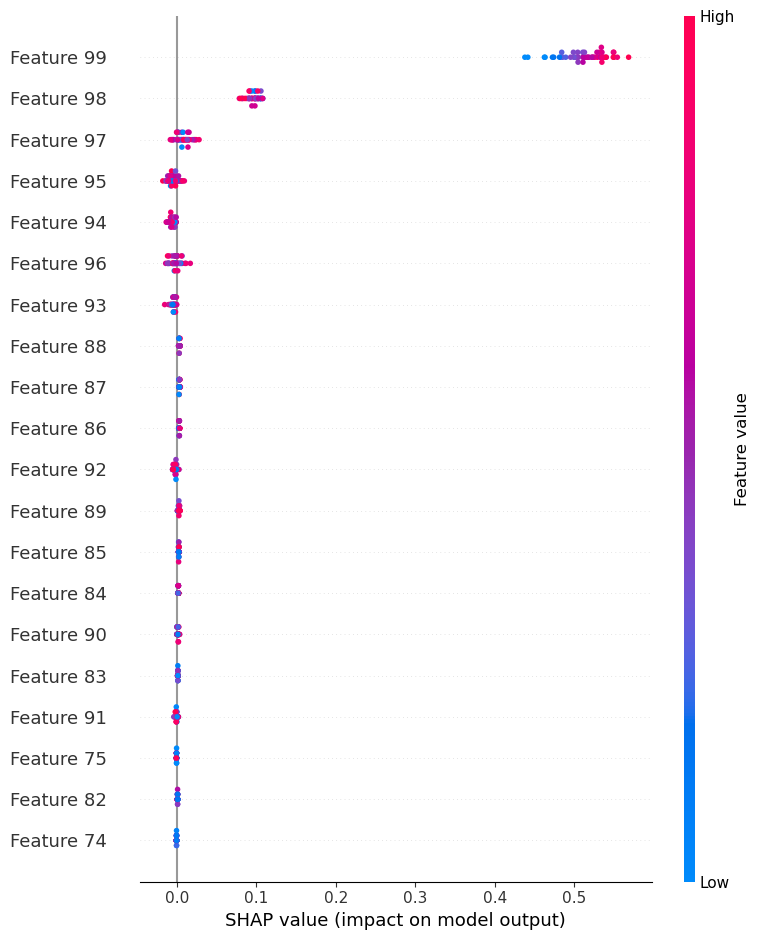

In [23]:
# Plot the SHAP summary plot
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values[:50], X_test[:50], show=False)
plt.savefig('SHAP plot.png')


The shap.summary_plot() function is a visualization tool provided by the SHAP (SHapley Additive exPlanations) library in Python. It's used to create a summary plot that helps you understand the distribution and impact of feature contributions (SHAP values) on the predictions made by a machine learning model. This plot provides insights into the overall behavior of the model and how different features influence its predictions.

Here's what the shap.summary_plot() function does and what it tells you:

Feature Importance: The plot displays a horizontal bar for each feature, showing the magnitude and direction of its average SHAP value across all instances in the dataset. The length of the bar indicates the impact of the feature on the model's predictions. Features with longer bars have a greater influence on predictions.

Position: The bars are positioned horizontally, with the positive side of the x-axis representing positive contributions and the negative side representing negative contributions. This helps you understand whether a feature tends to increase or decrease the model's predictions.

Distribution: The bars are shaded to reflect the distribution of the SHAP values for each feature. Darker regions of the bars represent regions of higher density, indicating where most SHAP values cluster. This gives you an idea of how consistent the feature's impact is across instances.

Interactions: If interactions between features are important, the summary plot may include interactions. Interactions show how two or more features' joint contributions affect predictions. These interactions can be represented by color gradients on the bars.

Comparative Analysis: The plot enables you to compare the contributions of different features and assess their relative importance. This is particularly useful for identifying key features driving the model's predictions.

Understanding Significance: By examining the positive and negative contributions of features, you can understand which factors contribute to increases or decreases in the model's predictions.

https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714
https://medium.com/@prajjwalchauhan94017/stock-prediction-and-forecasting-using-lstm-long-short-term-memory-9ff56625de73
